### Testing

In [1]:
import pysimdeum
import pysimdeum.core.utils as utils

In [2]:
house = pysimdeum.built_house(house_type='family')

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:286: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:342: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:342: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

In [3]:
house.appliances

[WcNew(name='WcNew'),
 BathroomTap(name='BathroomTap'),
 KitchenTap(name='KitchenTap'),
 NormalShower(name='NormalShower')]

In [4]:
consumption, discharge = house.simulate(duration='1 day', num_patterns=1, simulate_discharge=True, spillover=True)

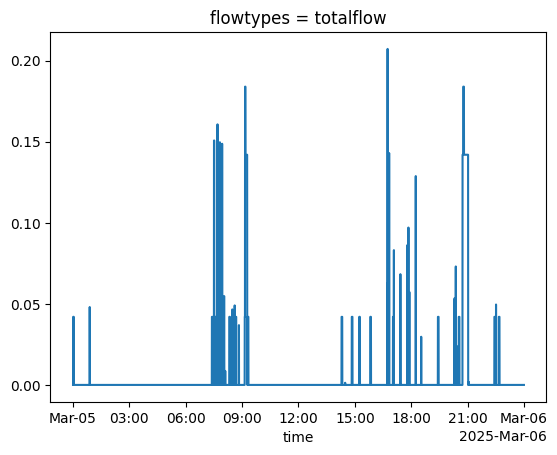

In [5]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).plot()

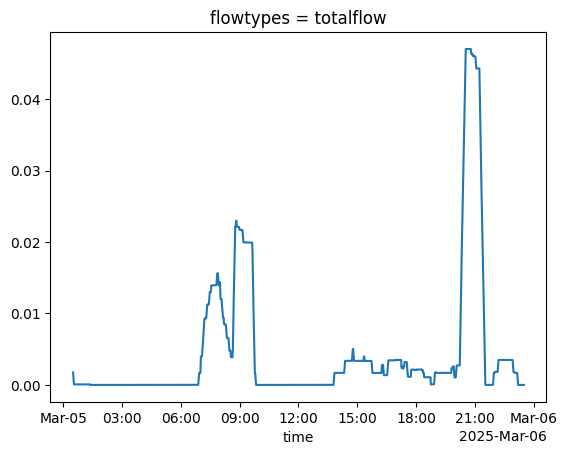

In [6]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).rolling(time=3600, center=True).mean().plot()

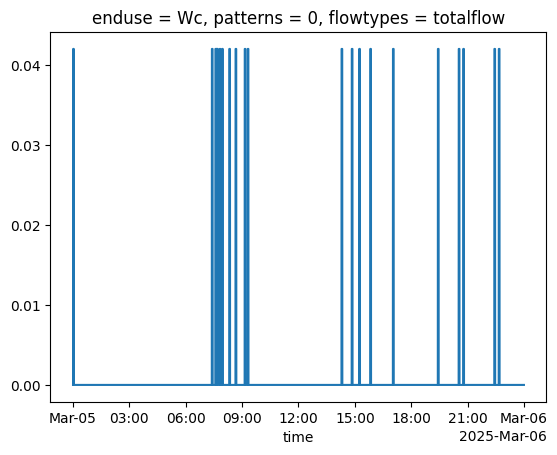

In [7]:
consumption.sum(["user"]).sel(enduse="Wc").sel(flowtypes="totalflow").plot()

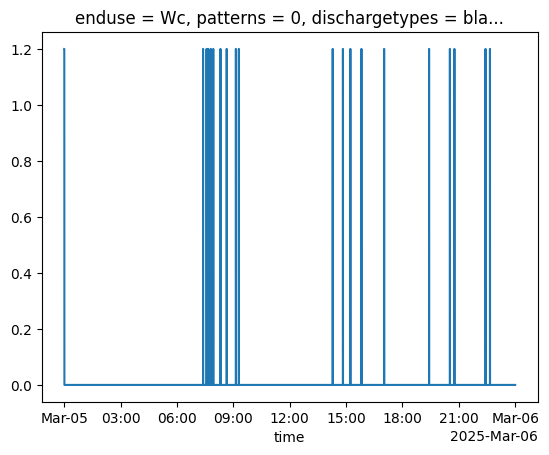

In [8]:
discharge.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater").plot()

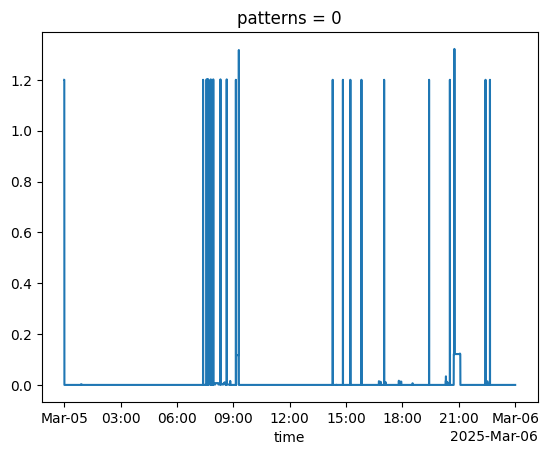

In [9]:
discharge.sum(["enduse","user","dischargetypes"]).plot()

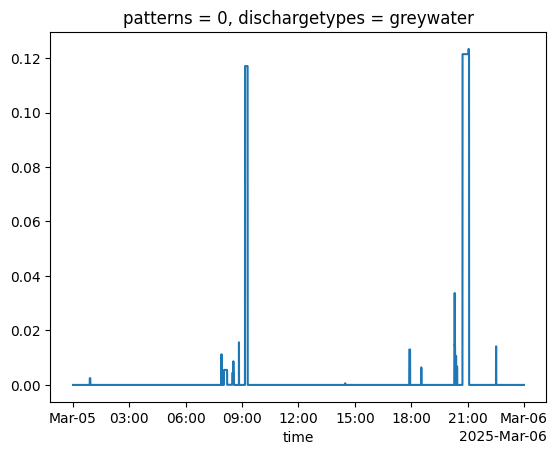

In [10]:
discharge.sum(["enduse","user"]).sel(dischargetypes="greywater").plot()

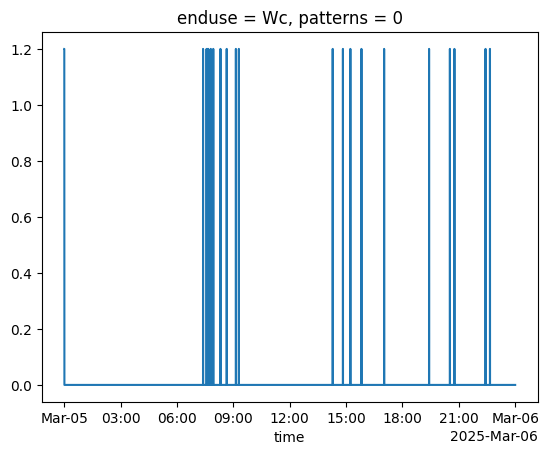

In [11]:
discharge.sum(["user","dischargetypes"]).sel(enduse="Wc").plot()

In [12]:
discharge

<xarray.DataArray (time: 86401, user: 6, enduse: 4, patterns: 1,
                   dischargetypes: 2)> Size: 33MB
array([[[[[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]]],


        [[[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]]],


        [[[0. , 0. ]],

...

         [[0. , 0. ]]],


        [[[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]]],


        [[[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]],

         [[0. , 0. ]]]]])
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-03-05 ... 2025-03-06
  * user            (user) <U9 216B 'user_1' 'user_2' ... 'user_5' 'household'
  * enduse          (enduse) <U11 176B 'Wc' 'BathroomTap' 'KitchenTap' 'Shower'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

## Applying nutrient concentration

In [18]:
ds = utils.process_discharge_nutrients(discharge)

In [19]:
ds

<xarray.Dataset> Size: 465MB
Dimensions:         (time: 86401, user: 6, enduse: 4, patterns: 1,
                     dischargetypes: 2, index: 4147248, columns: 12)
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-03-05 ... 2025-03-06
  * user            (user) <U9 216B 'user_1' 'user_2' ... 'user_5' 'household'
  * enduse          (enduse) <U11 176B 'Wc' 'BathroomTap' 'KitchenTap' 'Shower'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'
Dimensions without coordinates: index, columns
Data variables:
    discharge       (time, user, enduse, patterns, dischargetypes) float64 33MB ...
    df              (index, columns) object 398MB 2025-03-05 'user_1' ... 0.0
    df_index        (index) int64 33MB 0 1 2 3 ... 4147245 4147246 4147247
    df_columns      (columns) object 96B 'time' 'user' 'enduse' ... 'ss' 'amm'

In [20]:
df = utils.dataset_to_df(ds)
df[df['flow'] != 0]

,time,user,enduse,patterns,dischargetypes,flow,n,p,cod,bod5,ss,amm
33,2025-03-05 00:00:00,user_5,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
81,2025-03-05 00:00:01,user_5,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
129,2025-03-05 00:00:02,user_5,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
177,2025-03-05 00:00:03,user_5,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
225,2025-03-05 00:00:04,user_5,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...
3915129,2025-03-05 22:39:25,user_2,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
3915177,2025-03-05 22:39:26,user_2,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
3915225,2025-03-05 22:39:27,user_2,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048
3915273,2025-03-05 22:39:28,user_2,Wc,0,blackwater,1.2,0.146168,0.246581,0.9012,0.48,0.4692,0.048


In [34]:
house.appliances[0]

WcNew(name='WcNew')

In [30]:
discharge.enduse.values[0].subtype

AttributeError: 'numpy.str_' object has no attribute 'subtype'

In [35]:
consumption

<xarray.DataArray (time: 86401, user: 6, enduse: 4, patterns: 1, flowtypes: 2)> Size: 33MB
array([[[[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

...

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]]]])
Coordinates:
  * time       (time) datetime64[ns] 691kB 2025-03-05 ... 2025-03-06
  * user       (user) <U9 216B 'user_1' 'user_2' ... 'user_5' 'household'
  * enduse     (enduse) <U11 176B 'Wc' 'BathroomTap' 'KitchenTap' 'Shower'
  * patterns   (patterns) int64 8B 0
  * flowtypes  (flowtypes) <U9 72B 'totalflow' 'hotflow'